<a href="https://colab.research.google.com/github/asutosh07/SENTIMENT-ANALYSIS-OF-TWEETS/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***SENTIMENT ANALYSIS OF TWEETS***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

In [ ]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/TweetsTrain.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.drop(labels="id",axis=1,inplace=True)
#df['text'] = [tweet.get('text','') for tweet in df]
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
print("Total Positive Tweets =",end="   " )
print(df[df['label']==1].size)
print("Total Negative Tweets= ", end="   ")
print(df[df['label']==0].size)

Total Positive Tweets =   4484
Total Negative Tweets=    59440


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from nltk.stem.porter import *
import tensorflow as tf
from keras.preprocessing.sequence import pad_sequences
import random

In [ ]:
def preprocessing_1(data):
  data['tweet'] = data['tweet'].apply(lambda x: x.lower())
  #removing special @tweet
  data['tweet'] = data['tweet'].str.replace("@[\w]*", "")


  #removing special characters

  data['tweet'] = data['tweet'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
  return data

In [ ]:
def preprocessing_2(data):  
  #dictionoary size
  #max_features = 4000
  #tokenizing tweets
  #tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',num_words=max_features,split=' ')

  #using stemmer to make all the similar words same
  #stemmer = PorterStemmer()
  #text = text.apply(lambda x: [stemmer.stem(i) for i in x])
  #X = tokenizer.texts_to_sequences(text)

  #using pading to keep the length of tweets same
  #X = tf.keras.preprocessing.sequence.pad_sequences(X, padding='post')
  #print(tokenizer.get_config())


  #tokenizer = Tokenizer(num_words=max_fatures, split=' ')
  tokenizer.fit_on_texts(data['tweet'].values)
  X = tokenizer.texts_to_sequences(data['tweet'].values)
  X = pad_sequences(X)

  return X


In [ ]:
df = df.sample(frac = 1) #shuffling data set
df = preprocessing_1(df)
df.head(10)

,label,tweet
21923,0,he warned us which side hed choose if politica...
4085,0,oh no please kindly do not pressurize nations...
20703,0,just had my first order through on my facebo...
9472,0,live now girlfriend female mature webcammod...
27104,0,hope it goes well so everyone goes home thin...
4647,0,im so sick about this news of this little boy ...
28632,0,omg yay finally is finally coming to austral...
20698,0,never leave nothing of value at a nigga house ...
648,0,i am thankful for mason jars thankful positive...
12353,0,funny but tragically close to the truth folk...


In [ ]:
df = df.sample(frac = 1) #shuffling data set
max_features = 4000
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',num_words=max_features,split=' ')
X = preprocessing_2(df)
print(X)

[[   0    0    0 ...   13    9 1360]
 [   0    0    0 ...  432    1  446]
 [   0    0    0 ...   80 1751 2375]
 ...
 [   0    0    0 ...    1  426  876]
 [   0    0    0 ... 1414   14  228]
 [   0    0    0 ... 2354   52   51]]


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization,Embedding,SpatialDropout1D
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical


In [ ]:
embed_dim = 256

max_fatures = 4000
model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
'''
model.add(LSTM(256,recurrent_dropout=0.2,dropout=0.3,activation='relu',return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(256,recurrent_dropout=0.2,dropout=0.3,activation='relu',return_sequences=True))
model.add(BatchNormalization())'''

model.add(LSTM(512,recurrent_dropout=0.3,dropout=0.3,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(2,activation='softmax'))

model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(),metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 34, 256)           1024000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 34, 256)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1574912   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense (Dense)                (None, 2)                 1026      
Total params: 2,601,986
Trainable params: 2,600,962
Non-trainable params: 1,024
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(df['label']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(22373, 34) (22373, 2)
(9589, 34) (9589, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 10, batch_size=batch_size,validation_data = (X_test,Y_test))


Epoch 1/10
700/700 [==============================] - 113s 161ms/step - loss: 0.1849 - accuracy: 0.9391 - val_loss: 0.1459 - val_accuracy: 0.9483
Epoch 2/10
700/700 [==============================] - 109s 156ms/step - loss: 0.1076 - accuracy: 0.9638 - val_loss: 0.1306 - val_accuracy: 0.9565
Epoch 3/10
700/700 [==============================] - 107s 153ms/step - loss: 0.0842 - accuracy: 0.9720 - val_loss: 0.1415 - val_accuracy: 0.9570
Epoch 4/10
700/700 [==============================] - 107s 153ms/step - loss: 0.0642 - accuracy: 0.9775 - val_loss: 0.1650 - val_accuracy: 0.9587
Epoch 5/10
700/700 [==============================] - 109s 156ms/step - loss: 0.0502 - accuracy: 0.9823 - val_loss: 0.1656 - val_accuracy: 0.9547
Epoch 6/10
700/700 [==============================] - 109s 156ms/step - loss: 0.0405 - accuracy: 0.9862 - val_loss: 0.1963 - val_accuracy: 0.9559
Epoch 7/10
700/700 [==============================] - 110s 157ms/step - loss: 0.0332 - accuracy: 0.9888 - val_loss: 0.2073 -

In [ ]:
validation_size = 3000

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]

score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

206/206 - 2s - loss: 0.2806 - accuracy: 0.9522
score: 0.28
acc: 0.95


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1

1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1/1 - 0s
1

In [ ]:
print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

56 6533


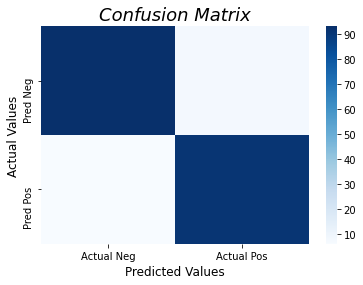

In [ ]:
y_labels = ['Pred Neg' ,'Pred Pos']
x_labels = ['Actual Neg','Actual Pos']
 
from sklearn.metrics import confusion_matrix
 
pred = model.predict(X_test)
pred= pred.astype(int)
 
cf_matrix=confusion_matrix(Y_test.argmax(axis=1),pred.argmax(axis=1))
pos = cf_matrix[0][1] + cf_matrix[1][1]
neg = cf_matrix[0][0] + cf_matrix[1][0]

cf_matrix[1][1] = cf_matrix[1][1]/pos*100
cf_matrix[0][1] = cf_matrix[0][1]/pos*100
cf_matrix[0][0] = cf_matrix[0][0]/neg*100
cf_matrix[1][0] = cf_matrix[1][0]/neg*100
 
sns.heatmap(cf_matrix,xticklabels=x_labels, yticklabels=y_labels , cmap='Blues',fmt=".2g")
plt.xlabel('Predicted Values',fontsize = 12)
plt.ylabel('Actual Values',fontsize = 12)
 
plt.title("Confusion Matrix", fontsize = 18, color='Black', fontstyle='italic')
plt.show()

In [ ]:
 
twt = ['A ridiculous virus caused so much tragedy']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    3 3385 2957   19  140  797]]
1/1 - 0s
negative
